In [20]:
%matplotlib inline

In [21]:
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import torch

In [22]:
import numpy as np
from numpy.linalg import norm

In [23]:
import gzip
words = []
vectors = []

for i, l in enumerate(gzip.open("../../hw/HW2/data/glove.6B.50d.txt.gz")):
    t = l.strip().split()
    words.append(t[0].decode())
    vectors.append(list(map(float, t[1:])))
    if i > 500000:
        break

In [24]:
wordvecs = np.array(vectors, dtype=np.double)

In [25]:
word2id = {word:i for i, word in enumerate(words)}

In [26]:
word2id["athens"]

3264

In [27]:
wordvecs[word2id["athens"]]

array([-0.080518 ,  1.0627   ,  0.14356  ,  0.51284  , -0.86614  ,
       -0.87747  , -0.081332 ,  0.62346  , -1.0791   , -0.26803  ,
        0.042063 , -1.1343   , -0.41609  , -0.44612  ,  0.75472  ,
        0.39791  ,  0.26783  ,  0.60382  , -1.1654   ,  0.2434   ,
        0.65747  , -0.089722 , -1.0805   ,  0.016183 ,  0.5644   ,
       -1.4807   ,  0.26113  , -0.0033073, -1.0285   , -0.34615  ,
        1.4185   ,  0.80099  , -0.24248  , -0.45811  , -0.030437 ,
        0.17815  ,  0.83084  ,  0.14041  , -0.14673  ,  0.35092  ,
       -0.46702  , -0.22738  ,  0.71731  , -0.29418  ,  0.35399  ,
        0.34459  , -0.27677  ,  0.56476  ,  0.75872  , -1.3752   ])

In [28]:
def nearest(vec, dot=False):
    vnorm = norm(vec)
    scores = []
    for i in range(len(words)):
        wvnorm = norm(wordvecs[i])
        if not dot:
            scores.append(np.dot(wordvecs[i], vec) / (vnorm * wvnorm))
        else:
            scores.append(np.dot(wordvecs[i], vec))
    score_ids = [(s, i) for i, s in enumerate(scores)]
    score_ids.sort()
    score_ids.reverse()
    return score_ids

In [29]:
closests = nearest(wordvecs[word2id["athens"]])

In [30]:
def print_nbest(closests):
    for score, i in closests[:20]:
        print("%s\t%s"%(words[i],score))
print_nbest(closests)

athens	1.0
thessaloniki	0.7532964581170345
budapest	0.7422959237428817
bucharest	0.7227211076847707
istanbul	0.7199855968137296
greece	0.7171782436368204
beijing	0.709548054230564
seoul	0.6979879922369402
piraeus	0.6904710845955688
sydney	0.688954838557876
olympics	0.6805295148730786
acropolis	0.6794105950324268
prague	0.6763434761057471
moscow	0.6735894301588881
olympic	0.6717382125122783
stockholm	0.6709350830491284
saturday	0.6656054504390918
osaka	0.6584513411045837
canberra	0.658331596849101
tokyo	0.6574943729510774


In [31]:
def analogy_vec(a, b, c):
    return wordvecs[word2id[b]] - wordvecs[word2id[a]] + wordvecs[word2id[c]]

In [32]:
d = analogy_vec("king", "queen", "man")
print_nbest(nearest(d))

woman	0.8903914113632075
girl	0.8453726146326286
man	0.8301757602547879
her	0.7845831508513259
boy	0.7763066318821366
she	0.7619764378563795
herself	0.7597628262240992
blind	0.7296755455448719
mother	0.7230340111204357
blonde	0.7136143547397359
stranger	0.7009638379988001
girls	0.7003802920133531
girlfriend	0.6982425716482145
old	0.6968970351173975
lover	0.6961711056646905
eyes	0.6935599534369058
young	0.6931815901719369
female	0.6920879835512826
teenager	0.6889370806579519
blond	0.6884889575259089


In [14]:
d = analogy_vec("athens", "greece", "oslo")
print_nbest(nearest(d))

oslo	0.8009408808046059
norway	0.724581222222652
cyprus	0.7106035029236297
accord	0.6723660595197362
iceland	0.6699855091356302
pact	0.6689833344860368
accords	0.6677311016802431
palestine	0.6663395537765883
brokered	0.6567744608129797
agreement	0.6545912646550025
norwegian	0.6536025429801965
treaty	0.6421235351617722
ankara	0.6418302994284169
copenhagen	0.6320540927368026
greece	0.6311644289875389
malta	0.62869558130703
cypriots	0.628685760458512
accession	0.6258452283697028
plo	0.6247091597349995
baltic	0.6137234548297547


In [36]:
to_show = [w.lower() for w in ["london", "england",
"Athens", "Greece",
"Berlin","Germany",
"Madrid","Spain",
"Rome","Italy",
"Paris","France",
"Bucharest", "Romania",
"Budapest", "Hungary",
"Vienna", "Austria",
"Warsaw", "Poland"]]

to_show_vecs = [wordvecs[word2id[w]] for w in to_show ]



In [33]:
to_show = [w.lower() for w in ["woods", "golf",
"agassi", "tennis",
"bonds","baseball",
"manning", "football",
"gretzky","hockey",
"jordan","basketball"
]]

to_show_vecs = [wordvecs[word2id[w]] for w in to_show ]


In [34]:
import sklearn.decomposition
t = sklearn.decomposition.PCA(2)
X_pca = t.fit_transform(to_show_vecs)

In [18]:
def plot_embedding(X, words, title=None, size=(3,3)):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=size)
    ax = plt.subplot(111)
    ids = {}
    

    for i in range(X.shape[0]):
        letter = words[i]
        ax.plot(X[i, 0], X[i, 1],".")
        ax.annotate(letter, (X[i, 0], X[i, 1]), fontsize=30) 
        if i % 2 == 0:
            ax.plot((X[i,0], X[i+1,0]), (X[i,1], X[i+1,1]))           

    plt.xticks([]), plt.yticks([])
    plt.axis('off')
    
    if title is not None:
        plt.title(title)
    plt.subplots_adjust(left=-0.2, right=1.2, top=1.2, bottom=-0.2)
    #plt.savefig("linear.png", dpi=100)

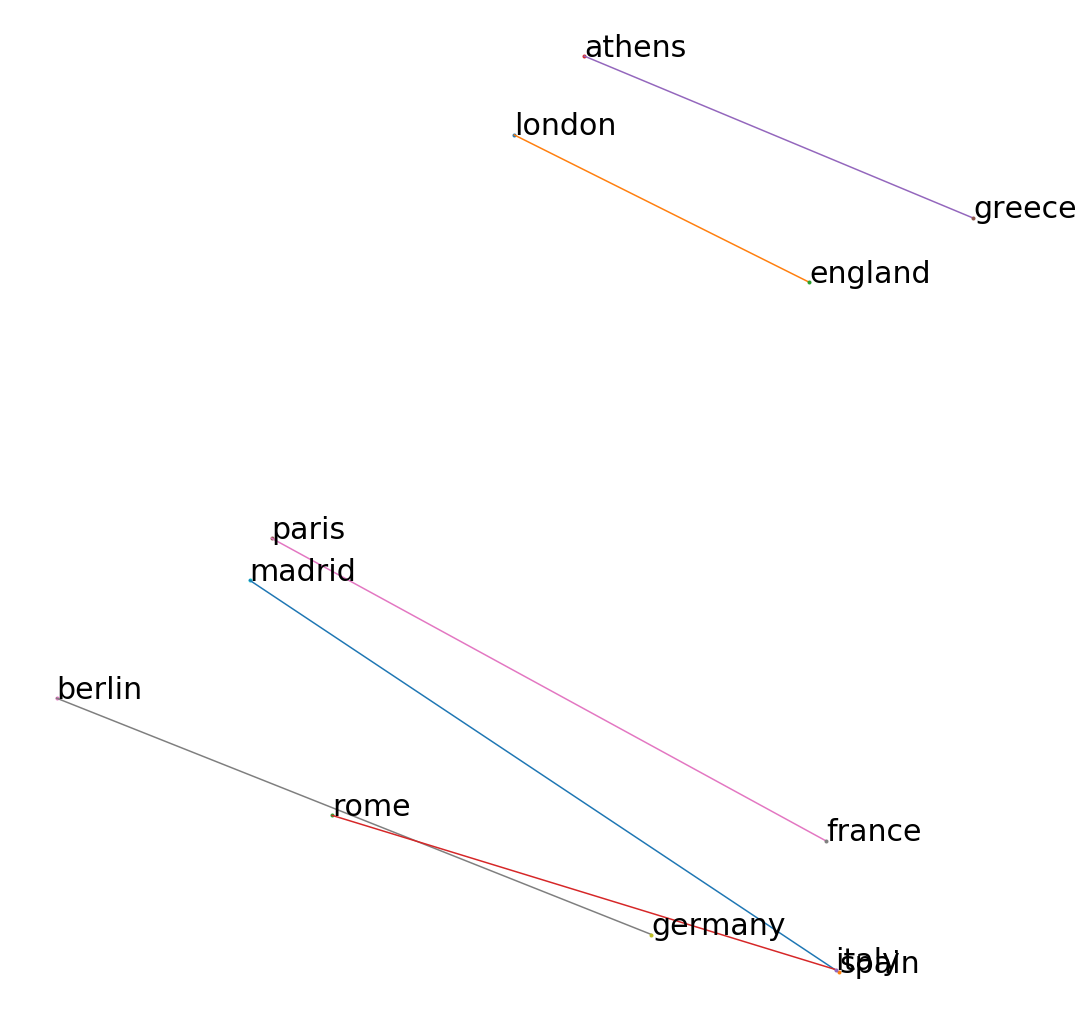

In [37]:
plot_embedding(X_pca, to_show, size=(10,10))

In [38]:
print_nbest(nearest(wordvecs[word2id["dog"]]))

dog	0.9999999999999999
cat	0.9218005273769252
dogs	0.8513158704257433
horse	0.7907582983221715
puppy	0.7754921210339847
pet	0.7724707346105002
rabbit	0.772081457264645
pig	0.7490061600379803
snake	0.7399188488797607
baby	0.7395570283883771
bite	0.7387937008159012
boy	0.7382799469245885
cats	0.7299785777480751
animal	0.7252255237339141
monkey	0.7247206950047795
rat	0.7245846453953351
mad	0.7244354883521754
crazy	0.7157995791103164
man	0.7121925584125339
elephant	0.7117622298048766


In [40]:
print_nbest(nearest(wordvecs[word2id["dog"]], dot=True))

dog	23.600607992182287
dogs	20.127214660386997
you	20.042543177050998
horse	19.75030601280904
cat	19.739068485226
your	19.233642485134006
eat	19.032687705672
my	18.916436206527997
boy	18.799658013923
girl	18.637389759949
baby	18.575685540766997
eating	18.401085463039998
animals	18.205859504321
man	18.145220792819995
woman	17.902702574754798
animal	17.801982997809002
pet	17.647616395009
fish	17.615063320408
'm	17.58356783606
europe/africa	17.5797524795996


In [41]:
from tensorboardX import SummaryWriter

In [42]:
writer = SummaryWriter()

In [51]:
help(writer.add_embedding)

Help on method add_embedding in module tensorboardX.writer:

add_embedding(mat, metadata=None, label_img=None, global_step=None, tag='default') method of tensorboardX.writer.SummaryWriter instance
    Add embedding projector data to summary.
    
    Args:
        mat (torch.Tensor): A matrix which each row is the feature vector of the data point
        metadata (list): A list of labels, each element will be convert to string
        label_img (torch.Tensor): Images correspond to each data point
        global_step (int): Global step value to record
        tag (string): Name for the embedding
    Shape:
        mat: :math:`(N, D)`, where N is number of data and D is feature dimension
    
        label_img: :math:`(N, C, H, W)`
    
    Examples::
    
        import keyword
        import torch
        meta = []
        while len(meta)<100:
            meta = meta+keyword.kwlist # get some strings
        meta = meta[:100]
    
        for i, v in enumerate(meta):
            meta[i

In [43]:
writer.add_embedding(torch.FloatTensor(wordvecs[:5000    ]), tag="words", metadata=words[:5000] )

In [44]:
writer.close()